<a href="https://colab.research.google.com/github/ArjuK97/InspiraTask/blob/main/HR_ATTRIBUTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn
%pip install jupysql --upgrade duckdb-engine --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.8/192.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 8.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [7]:
# Change the file path to the correct path if necessary
# Verify the exact file name and path using !ls /content/sample_data/
!ls /content/sample_data/
df_HR ="/content/WA_Fn-UseC_-HR-Employee-Attrition.csv.xlsx" # Assuming this is the correct path to the Excel file

# Use pd.read_excel to read the Excel file
df_HR = pd.read_excel(df_HR)
df_HR.head()

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
import sqlite3
connection = sqlite3.connect(':memory:')  # Use ':memory:' for temporary database
df_HR.to_sql('employees', connection, index=False, if_exists='replace')
query = "select Age, Department, JobRole, YearsAtCompany , Attrition from employees limit 5"
pd.read_sql(query, connection)

,Age,Department,JobRole,YearsAtCompany,Attrition
0,41,Sales,Sales Executive,6,Yes
1,49,Research & Development,Research Scientist,10,No
2,37,Research & Development,Laboratory Technician,0,Yes
3,33,Research & Development,Research Scientist,8,No
4,27,Research & Development,Laboratory Technician,2,No


In [9]:
query1 = """SELECT
    ROUND(SUM(attrition = 'Yes') * 100.0 / COUNT(*), 2) AS attrition_rate
FROM employees;"""

pd.read_sql(query1, connection)

,attrition_rate
0,16.12


In [10]:
query2 = """SELECT
    department,
    COUNT(*) AS total_employees,
    SUM(attrition = 'Yes') AS leavers,
    ROUND(SUM(attrition = 'Yes') * 100.0 / COUNT(*), 2) AS attrition_rate
FROM employees
GROUP BY department
ORDER BY attrition_rate DESC;"""

pd.read_sql(query2, connection)

,Department,total_employees,leavers,attrition_rate
0,Sales,446,92,20.63
1,Human Resources,63,12,19.05
2,Research & Development,961,133,13.84


In [11]:
query3 = """SELECT
    Gender,
    COUNT(*) AS total_employees,
    SUM(attrition = 'Yes') AS leavers,
    ROUND(SUM(attrition = 'Yes') * 100.0 / COUNT(*), 2) AS attrition_rate
FROM employees
GROUP BY Gender
ORDER BY attrition_rate DESC;"""

pd.read_sql(query3, connection)

,Gender,total_employees,leavers,attrition_rate
0,Male,882,150,17.01
1,Female,588,87,14.80


In [12]:
query4 = """SELECT
    JobRole,
    COUNT(*) AS total_employees,
    SUM(attrition = 'Yes') AS leavers,
    ROUND(SUM(attrition = 'Yes') * 100.0 / COUNT(*), 2) AS attrition_rate
FROM employees
GROUP BY JobRole
ORDER BY attrition_rate DESC;"""

pd.read_sql(query4, connection)

,JobRole,total_employees,leavers,attrition_rate
0,Sales Representative,83,33,39.76
1,Laboratory Technician,259,62,23.94
2,Human Resources,52,12,23.08
3,Sales Executive,326,57,17.48
4,Research Scientist,292,47,16.10
5,Manufacturing Director,145,10,6.90
6,Healthcare Representative,131,9,6.87
7,Manager,102,5,4.90
8,Research Director,80,2,2.50


In [13]:
query5 = """SELECT
    Department, JobRole, Gender,
    COUNT(*) AS total_employees,
    SUM(attrition = 'Yes') AS leavers,
    ROUND(SUM(attrition = 'Yes') * 100.0 / COUNT(*), 2) AS attrition_rate
FROM employees
GROUP BY Department, JobRole, Gender
ORDER BY attrition_rate DESC;"""

pd.read_sql(query5, connection)

,Department,JobRole,Gender,total_employees,leavers,attrition_rate
0,Sales,Sales Representative,Female,38,16,42.11
1,Sales,Sales Representative,Male,45,17,37.78
2,Human Resources,Human Resources,Female,16,6,37.50
3,Research & Development,Laboratory Technician,Male,174,46,26.44
4,Sales,Sales Executive,Male,194,37,19.07
5,Research & Development,Laboratory Technician,Female,85,16,18.82
6,Research & Development,Research Scientist,Male,178,30,16.85
7,Human Resources,Human Resources,Male,36,6,16.67
8,Sales,Sales Executive,Female,132,20,15.15
9,Research & Development,Research Scientist,Female,114,17,14.91


In [14]:
query6 = """SELECT
    ROUND(AVG(YearsAtCompany), 2) AS average_tenure
FROM employees;"""

pd.read_sql(query6, connection)


,average_tenure
0,7.01


In [15]:
query7 = """SELECT
    JobRole,
    ROUND(AVG(YearsInCurrentRole), 2) AS avg_years_in_role
FROM employees
GROUP BY JobRole
ORDER BY avg_years_in_role DESC;"""

pd.read_sql(query7, connection)


,JobRole,avg_years_in_role
0,Manager,6.45
1,Research Director,6.29
2,Manufacturing Director,4.97
3,Sales Executive,4.86
4,Healthcare Representative,4.86
5,Research Scientist,3.27
6,Laboratory Technician,3.20
7,Human Resources,3.13
8,Sales Representative,2.01


In [21]:
# Print the current column names to verify
print(df_HR.columns)

# Select relevant columns
df_HR = df_HR[['age', 'gender', 'department', 'job_role', 'attrition',
         'years_at_company', 'years_in_current_role']]

# Rename columns for consistency
df_HR.columns = ['age', 'gender', 'department', 'job_role', 'attrition',
              'years_at_company', 'years_in_current_role']

# Confirm structure
print(df_HR.head())

Index(['age', 'gender', 'department', 'job_role', 'attrition',
       'years_at_company', 'years_in_current_role'],
      dtype='object')
   age  gender              department               job_role attrition  \
0   41  Female                   Sales        Sales Executive       Yes   
1   49    Male  Research & Development     Research Scientist        No   
2   37    Male  Research & Development  Laboratory Technician       Yes   
3   33  Female  Research & Development     Research Scientist        No   
4   27    Male  Research & Development  Laboratory Technician        No   

   years_at_company  years_in_current_role  
0                 6                      4  
1                10                      7  
2                 0                      0  
3                 8                      7  
4                 2                      2  


In [22]:
role_attrition = df_HR.groupby('job_role')['attrition'].value_counts(normalize=True).unstack().fillna(0)
role_attrition['Attrition Rate (%)'] = role_attrition['Yes'] * 100
print(role_attrition)

attrition                        No       Yes  Attrition Rate (%)
job_role                                                         
Healthcare Representative  0.931298  0.068702            6.870229
Human Resources            0.769231  0.230769           23.076923
Laboratory Technician      0.760618  0.239382           23.938224
Manager                    0.950980  0.049020            4.901961
Manufacturing Director     0.931034  0.068966            6.896552
Research Director          0.975000  0.025000            2.500000
Research Scientist         0.839041  0.160959           16.095890
Sales Executive            0.825153  0.174847           17.484663
Sales Representative       0.602410  0.397590           39.759036


In [23]:
dept_attrition = df_HR.groupby('department')['attrition'].value_counts(normalize=True).unstack().fillna(0)
dept_attrition['Attrition Rate (%)'] = dept_attrition['Yes'] * 100
print(dept_attrition)

attrition                     No       Yes  Attrition Rate (%)
department                                                    
Human Resources         0.809524  0.190476           19.047619
Research & Development  0.861602  0.138398           13.839750
Sales                   0.793722  0.206278           20.627803


In [24]:
gender_attrition = df_HR.groupby('gender')['attrition'].value_counts(normalize=True).unstack().fillna(0)
gender_attrition['Attrition Rate (%)'] = gender_attrition['Yes'] * 100
print(gender_attrition)

attrition        No       Yes  Attrition Rate (%)
gender                                           
Female     0.852041  0.147959           14.795918
Male       0.829932  0.170068           17.006803


In [28]:
df_HR['Attrition_Flag'] = df_HR['attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df_HR['HireDate'] = pd.to_datetime('today') - pd.to_timedelta(df_HR['years_at_company'] * 365, unit='D')
df_HR['HireMonth'] = df_HR['HireDate'].dt.to_period('M')

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

<ipython-input-30-609252234>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


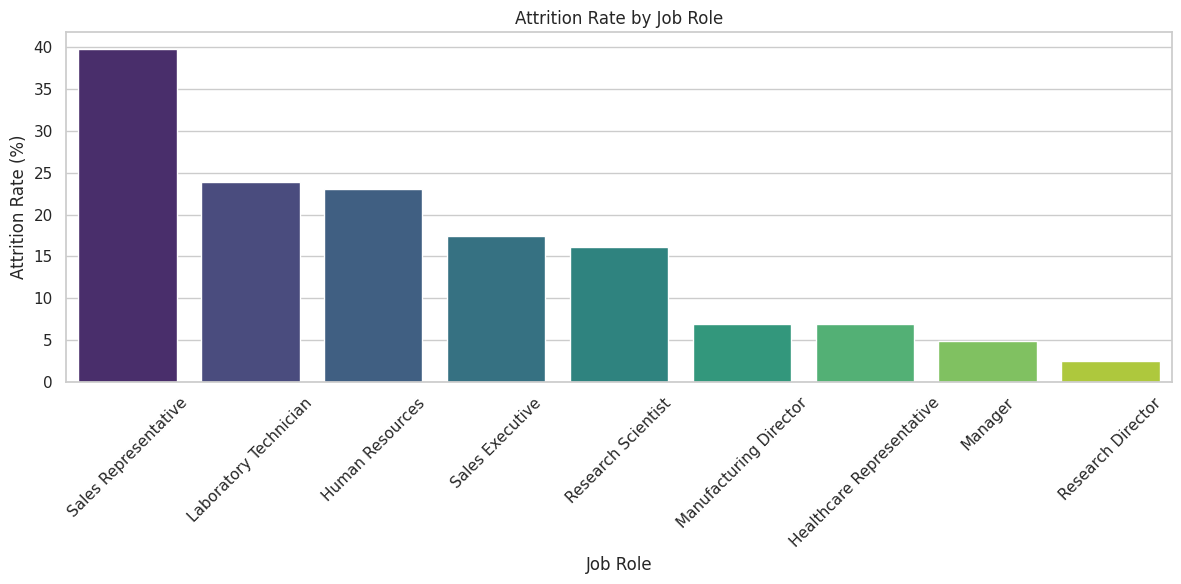

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=role_attrition['Attrition Rate (%)'].sort_values(ascending=False).index,
    y=role_attrition['Attrition Rate (%)'].sort_values(ascending=False).values,
    palette='viridis'
)
plt.title('Attrition Rate by Job Role')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Job Role')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-31-4243278277>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


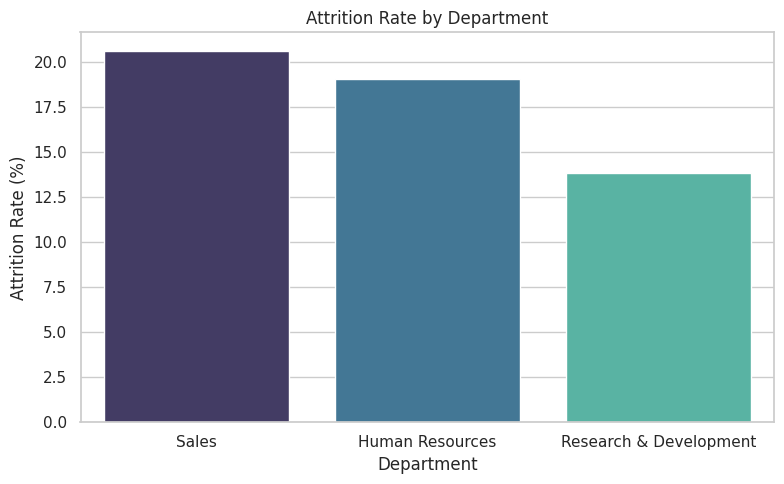

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=dept_attrition['Attrition Rate (%)'].sort_values(ascending=False).index,
    y=dept_attrition['Attrition Rate (%)'].sort_values(ascending=False).values,
    palette='mako'
)
plt.title('Attrition Rate by Department')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Department')
plt.tight_layout()
plt.show()


<ipython-input-32-683721548>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


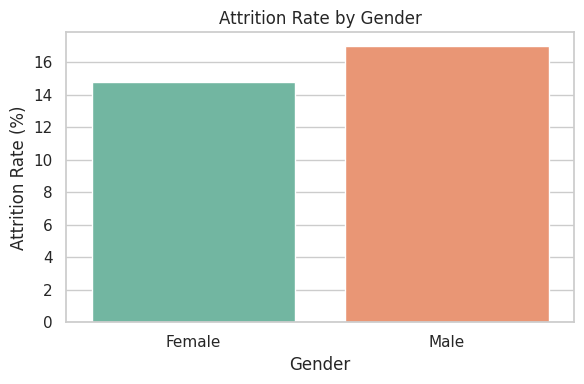

In [32]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=gender_attrition.index,
    y=gender_attrition['Attrition Rate (%)'].values,
    palette='Set2'
)
plt.title('Attrition Rate by Gender')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()


In [34]:
# Grouping for each timeframe
monthly_attr = df_HR.groupby('HireMonth')['Attrition_Flag'].mean().sort_index()

# Filter time windows
last_1y = monthly_attr[-12:]
last_6m = monthly_attr[-6:]
last_1m = monthly_attr[-1:]


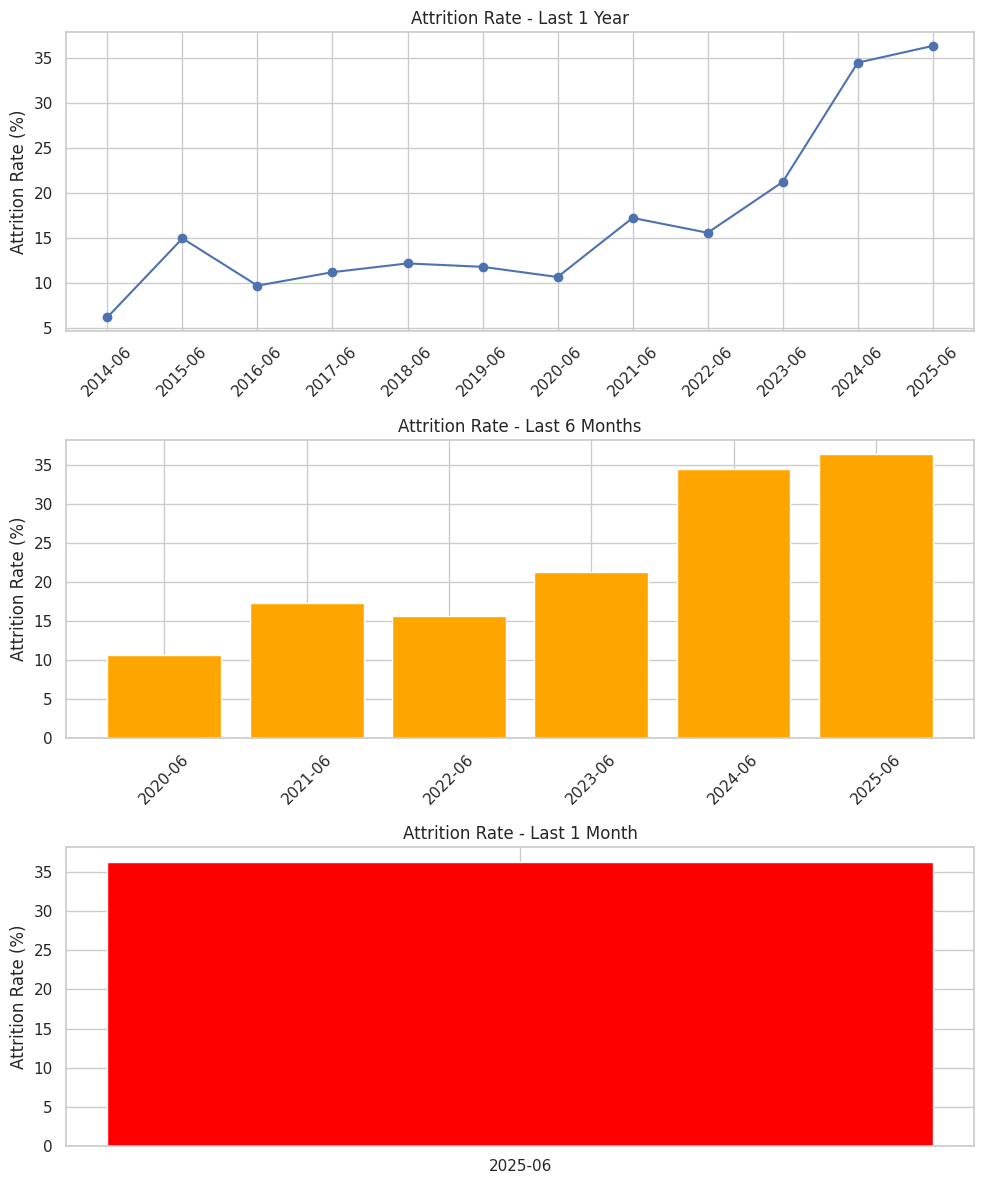

In [35]:

fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# 1 Year
axs[0].plot(last_1y.index.astype(str), last_1y.values * 100, marker='o')
axs[0].set_title("Attrition Rate - Last 1 Year")
axs[0].set_ylabel("Attrition Rate (%)")
axs[0].tick_params(axis='x', rotation=45)

# 6 Months
axs[1].bar(last_6m.index.astype(str), last_6m.values * 100, color='orange')
axs[1].set_title("Attrition Rate - Last 6 Months")
axs[1].set_ylabel("Attrition Rate (%)")
axs[1].tick_params(axis='x', rotation=45)

# 1 Month
axs[2].bar(last_1m.index.astype(str), last_1m.values * 100, color='red')
axs[2].set_title("Attrition Rate - Last 1 Month")
axs[2].set_ylabel("Attrition Rate (%)")

plt.tight_layout()
plt.show()


In [ ]:
overall_attrition_rate = (df_HR['attrition'] == 'Yes').mean() * 100
print(f"Overall Attrition Rate: {overall_attrition_rate:.2f}%")


Overall Attrition Rate: 16.12%
